In [7]:
# import torch
# import torch.nn as nn
# from torch.nn import functional as F
import numpy as np
from transformers import AutoTokenizer
import json
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [8]:
tokenizer_path = "/cognitive_comp/lincong/models/Llama-2-13B-Chat-fp16"
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)

In [9]:
exp_path = '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644'
jsfile_list = glob.glob(r'/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/**.json')
jsfile_list

['/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step54.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step74.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step34.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step24.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step18.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step68.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step92.json',
 '/cognitive_comp/lincong/experiments/chatgpt/workspace

In [10]:
def read_js(path):
    with open(path, 'r') as file:
        file = json.load(file)
    return file

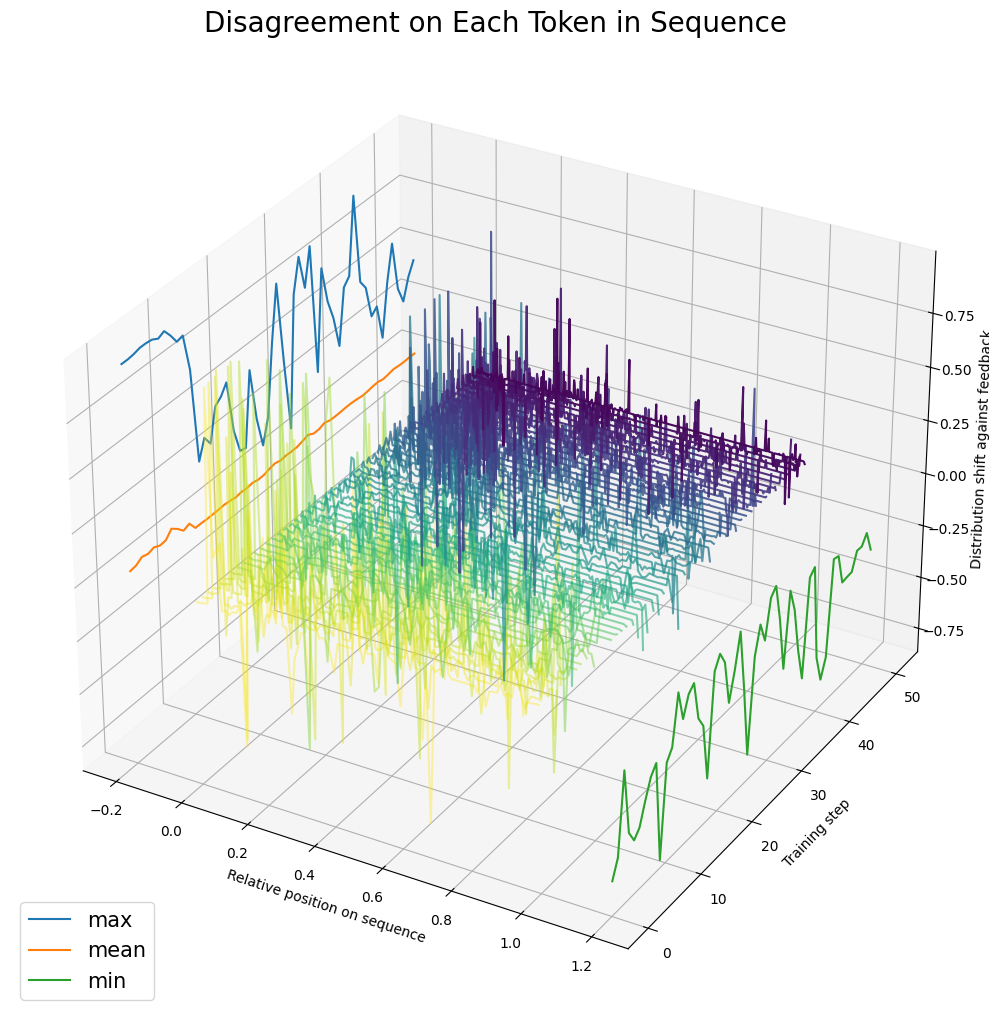

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
steps_num = len(jsfile_list)
max_bar = []
min_bar = []
mean_bar = []
for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        prob.append(js[str(i)]['prob'])
        ref_prob.append(js[str(i)]['ref_prob'])
    diff = np.array(prob) - np.array(ref_prob)
    max_bar.append(diff.max())
    min_bar.append(diff.min())
    mean_bar.append(diff.mean())
ax.plot([-0.2] * steps_num, max_bar, zs=list(range(steps_num)), zdir='y', label='max')
ax.plot([-0.2] * steps_num, mean_bar, zs=list(range(steps_num)), zdir='y', label='mean')
ax.plot([1.2] * steps_num, min_bar, zs=list(range(steps_num)), zdir='y', label='min')

for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        prob.append(js[str(i)]['prob'])
        ref_prob.append(js[str(i)]['ref_prob'])
    diff = np.array(prob) - np.array(ref_prob)
    x = np.arange(0, len(diff))/ len(diff)
    ax.plot(x, diff, zs=_, zdir='y', alpha=0.4 + 0.6 * _/steps_num, color=plt.get_cmap('viridis')(1 - _/steps_num))
ax.set_xlabel('Relative position on sequence')
ax.set_ylabel('Training step')
ax.set_zlabel('Distribution shift against feedback')
plt.grid()
plt.legend(loc='lower left',fontsize=15)
plt.tight_layout()
plt.title('Disagreement on Each Token in Sequence', fontsize=20)
# plt.savefig('1.PNG')
plt.show()

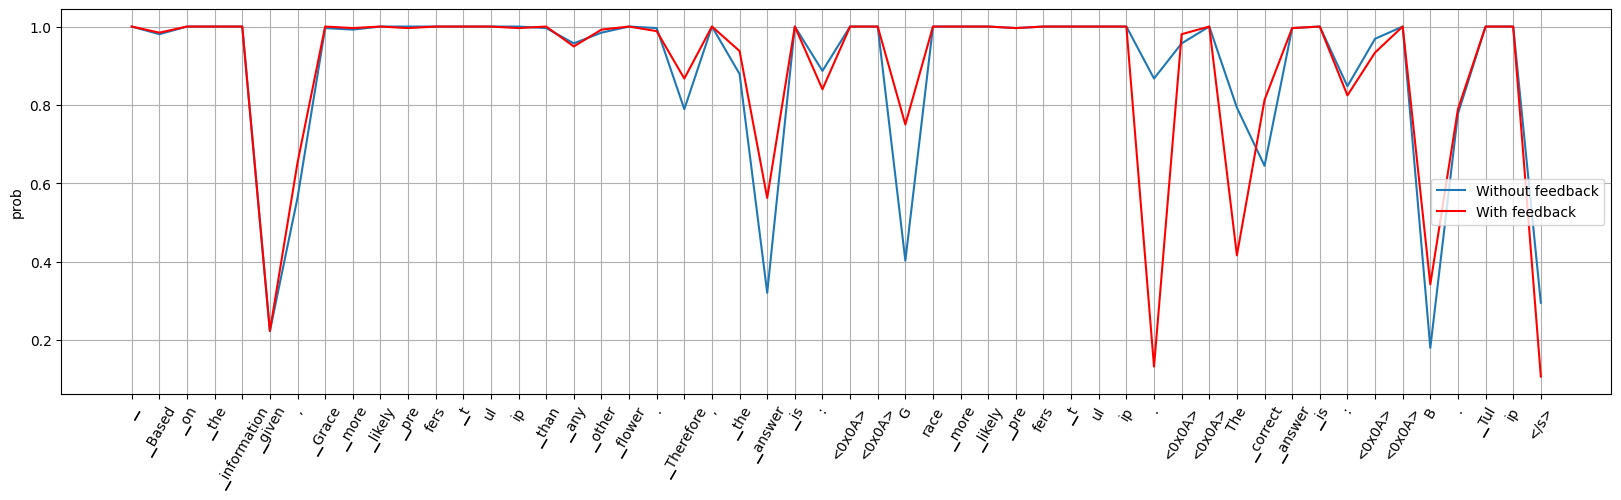

In [48]:
js = read_js( '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step24.json')
prob = []
ref_prob = []
tokens = []
for i in range(js['length']):
    prob.append(js[str(i)]['prob'])
    ref_prob.append(js[str(i)]['ref_prob'])
    tokens.append(js[str(i)]['token'])
tokens = tokenizer.convert_ids_to_tokens(tokens)

x = list(range(js['length']))
plt.figure(figsize=(20,5))
plt.plot(x, prob, label='Without feedback')
plt.plot(x, ref_prob, 'r', label='With feedback')
plt.yscale('linear')
plt.xticks(x, tokens, rotation=60)
plt.grid()
plt.legend(loc='center right', fontsize=10)
plt.ylabel('prob')
plt.show()

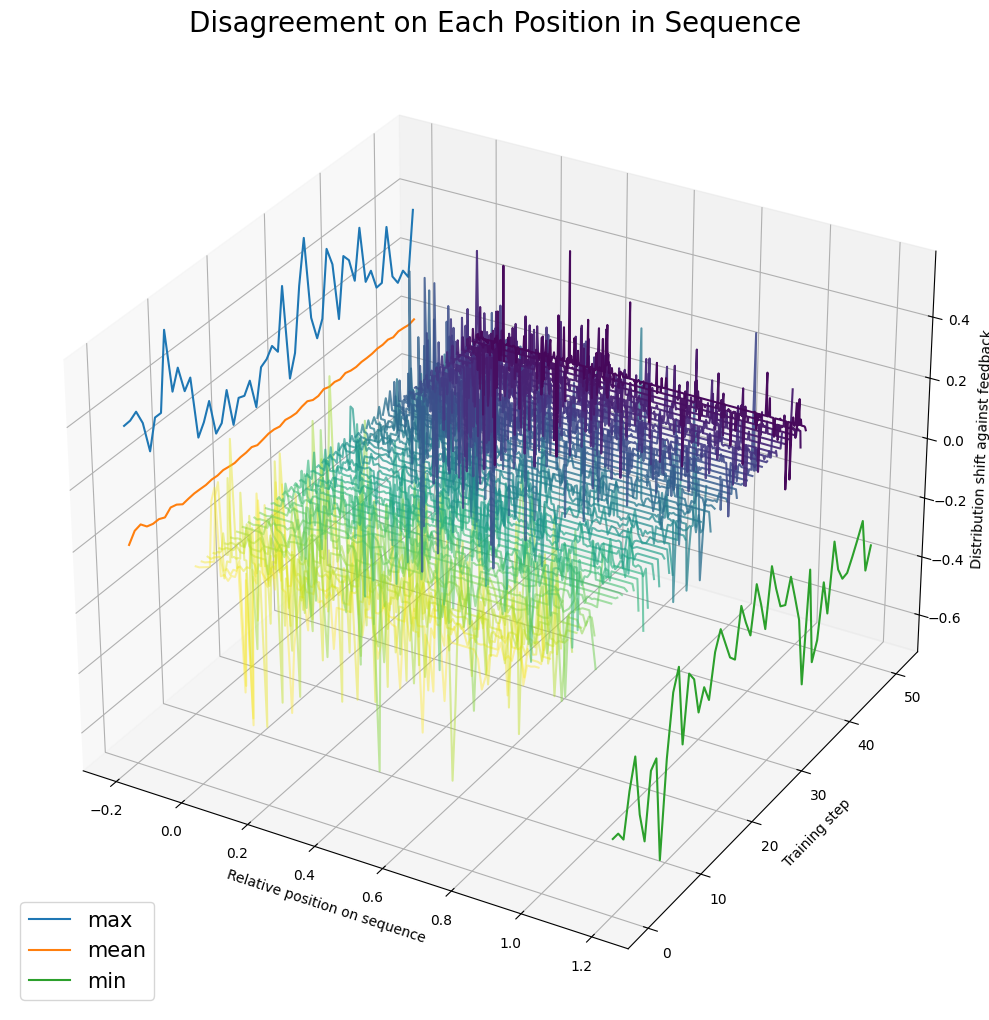

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
steps_num = len(jsfile_list)
max_bar = []
min_bar = []
mean_bar = []
for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        prob.append(js[str(i)]['topk']['values'][0])
        ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    diff = np.array(prob) - np.array(ref_prob)
    max_bar.append(diff.max())
    min_bar.append(diff.min())
    mean_bar.append(diff.mean())
ax.plot([-0.2] * steps_num, max_bar, zs=list(range(steps_num)), zdir='y', label='max')
ax.plot([-0.2] * steps_num, mean_bar, zs=list(range(steps_num)), zdir='y', label='mean')
ax.plot([1.2] * steps_num, min_bar, zs=list(range(steps_num)), zdir='y', label='min')

for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        prob.append(js[str(i)]['topk']['values'][0])
        ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    diff = np.array(prob) - np.array(ref_prob)
    x = np.arange(0, len(diff))/ len(diff)
    ax.plot(x, diff, zs=_, zdir='y', alpha=0.4 + 0.6 * _/steps_num, color=plt.get_cmap('viridis')(1 - _/steps_num))
ax.set_xlabel('Relative position on sequence')
ax.set_ylabel('Training step')
ax.set_zlabel('Distribution shift against feedback')
plt.grid()
plt.legend(loc='lower left',fontsize=15)
plt.tight_layout()
plt.title('Disagreement on Each Position in Sequence', fontsize=20)
# plt.savefig('2.pdf')
plt.show()

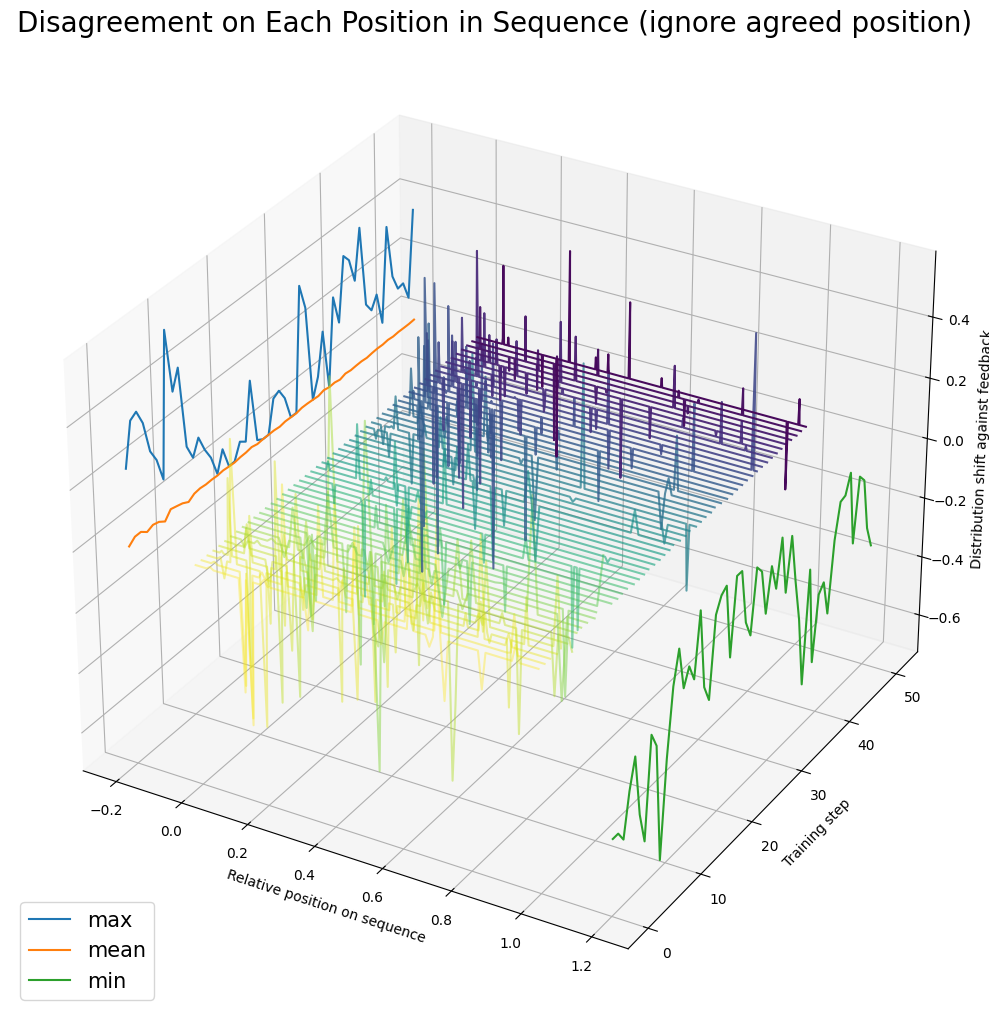

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
steps_num = len(jsfile_list)
max_bar = []
min_bar = []
mean_bar = []
for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        if js[str(i)]['topk']['indices'][0] == js[str(i)]['topk']['ref_indices'][0]:
            prob.append(0)
            ref_prob.append(0)
        else:
            prob.append(js[str(i)]['topk']['values'][0])
            ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    diff = np.array(prob) - np.array(ref_prob)
    max_bar.append(diff.max())
    min_bar.append(diff.min())
    mean_bar.append(diff.mean())
ax.plot([-0.2] * steps_num, max_bar, zs=list(range(steps_num)), zdir='y', label='max')
ax.plot([-0.2] * steps_num, mean_bar, zs=list(range(steps_num)), zdir='y', label='mean')
ax.plot([1.2] * steps_num, min_bar, zs=list(range(steps_num)), zdir='y', label='min')

for _ in range(steps_num):
    filename = exp_path + f'/exp_step{2 * _ + 2}.json'
    js = read_js(filename)
    prob = []
    ref_prob = []
    for i in range(js['length']):
        if js[str(i)]['topk']['indices'][0] == js[str(i)]['topk']['ref_indices'][0]:
            prob.append(0)
            ref_prob.append(0)
        else:
            prob.append(js[str(i)]['topk']['values'][0])
            ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    diff = np.array(prob) - np.array(ref_prob)
    x = np.arange(0, len(diff))/ len(diff)
    ax.plot(x, diff, zs=_, zdir='y', alpha=0.4 + 0.6 * _/steps_num, color=plt.get_cmap('viridis')(1 - _/steps_num))
ax.set_xlabel('Relative position on sequence')
ax.set_ylabel('Training step')
ax.set_zlabel('Distribution shift against feedback')
plt.grid()
plt.legend(loc='lower left',fontsize=15)
plt.tight_layout()
plt.title('Disagreement on Each Position in Sequence (ignore agreed position)', fontsize=20)
# plt.savefig('2.pdf')
plt.show()

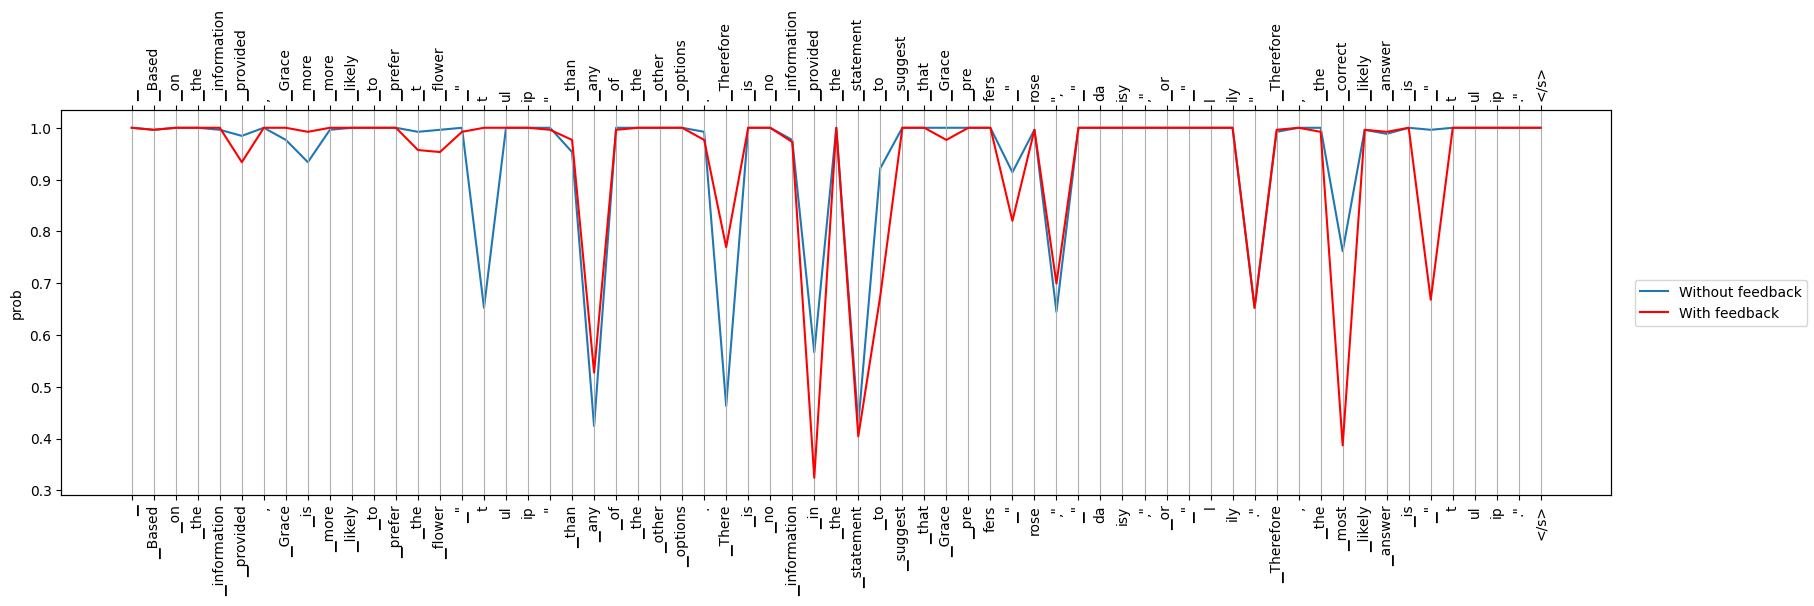

In [45]:
js = read_js( '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step18.json')
prob = []
ref_prob = []
tokens = []
ref_tokens = []
for i in range(js['length']):
    prob.append(js[str(i)]['topk']['values'][0])
    tokens.append(js[str(i)]['topk']['indices'][0])
    ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    ref_tokens.append(js[str(i)]['topk']['ref_indices'][0])
tokens = tokenizer.convert_ids_to_tokens(tokens)
ref_tokens = tokenizer.convert_ids_to_tokens(ref_tokens)
prob = np.array(prob)
ref_prob = np.array(ref_prob)

x = list(range(js['length']))
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,prob, label='Without feedback')
ax1.set_xticks(x, tokens, rotation=90)
ax1.set_ylabel('prob')
ax2 = ax1.twiny()
ax2.plot(x,ref_prob, 'r', label='With feedback')
ax2.set_xticks(x, ref_tokens, rotation=90)

plt.grid()
fig.legend(loc='center right')
plt.show()

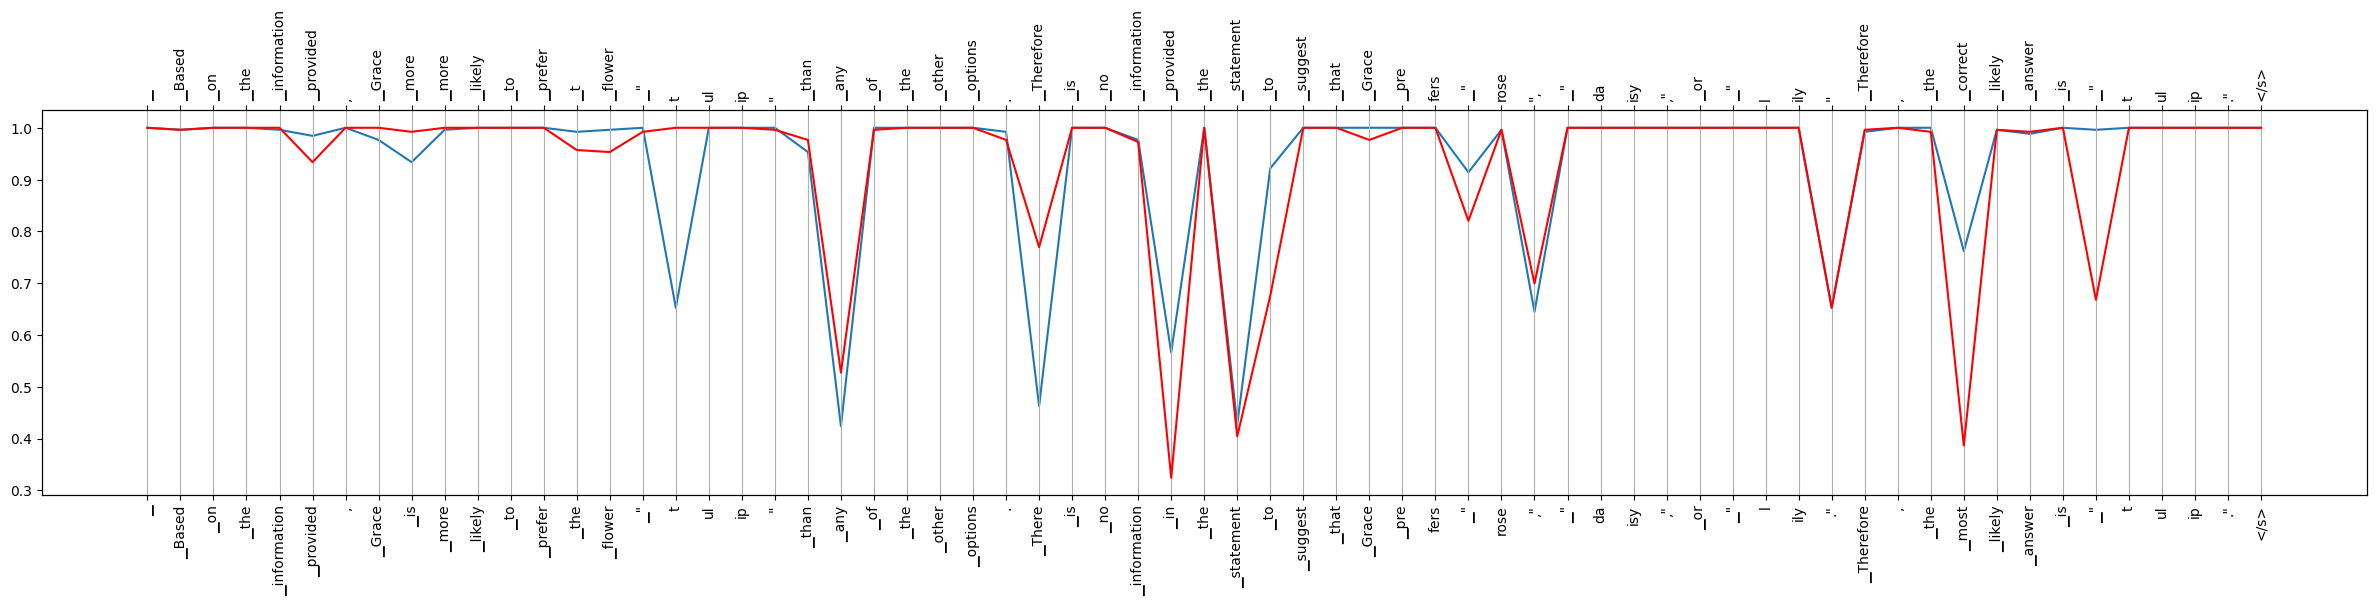

In [46]:
js = read_js( '/cognitive_comp/lincong/experiments/chatgpt/workspace/exp/FDSB-argtop-single-query-hgx024.scc.idea-20231207_112644/exp_step18.json')
prob = []
ref_prob = []
tokens = []
ref_tokens = []
for i in range(js['length']):
    prob.append(js[str(i)]['topk']['values'][0])
    tokens.append(js[str(i)]['topk']['indices'][0])
    ref_prob.append(js[str(i)]['topk']['ref_values'][0])
    ref_tokens.append(js[str(i)]['topk']['ref_indices'][0])
tokens = tokenizer.convert_ids_to_tokens(tokens)
ref_tokens = tokenizer.convert_ids_to_tokens(ref_tokens)
prob = np.array(prob)
ref_prob = np.array(ref_prob)

x = list(range(js['length']))
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,prob)
ax1.set_xticks(x, tokens, rotation=90)
ax2 = ax1.twiny()
ax2.plot(x,ref_prob,'r')
ax2.set_xticks(x, ref_tokens, rotation=90)

# plt.yscale('log')
plt.grid()
plt.show()

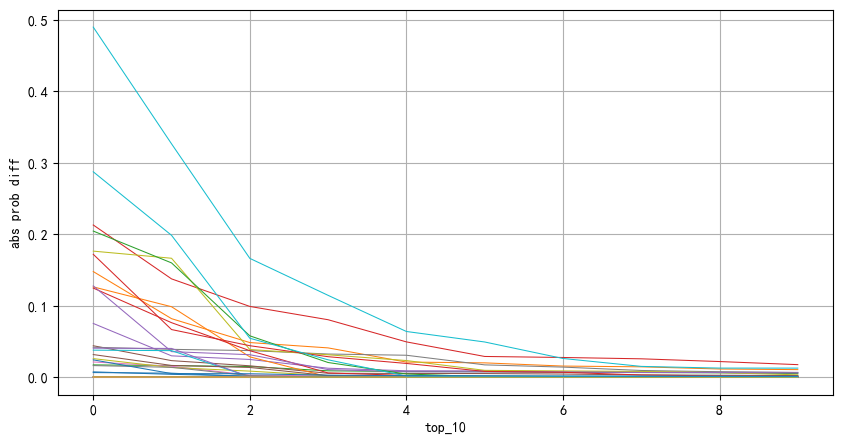

In [96]:
prompt1 = '<Human Round-1>:请续写这句话：今天老师生病了，没来上课，\n<Assistant Round-1>:'
inputs1 = tokenizer(prompt1, return_tensors="pt").input_ids.cuda()

prompt2 = '<Human Round-1>:请用高兴的语气续写这句话：今天老师生病了，没来上课，\n<Assistant Round-1>:'
inputs2 = tokenizer(prompt2, return_tensors="pt").input_ids.cuda()

fig = plt.figure(figsize=(10,5))

diff_list = []
indices_list = []
token_list = []

for i in range(31):
    model_input1 = model.prepare_inputs_for_generation(inputs1)
    model_input2 = model.prepare_inputs_for_generation(inputs2)
    output1 = model(**model_input1)
    output2 = model(**model_input2)
    prob1 = F.softmax(output1.logits[:, -1, :], dim=-1)
    prob2 = F.softmax(output2.logits[:, -1, :], dim=-1)

    diff = torch.abs(prob1 - prob2)
    diff, indices = torch.sort(diff, descending=True)
    diff_list.append(diff[0][:10].tolist())
    indices_list.append(indices[0][:10])
    # print(diff[0][:10].tolist(), tokenizer.decode(indices[0][:10]))
    plt.plot(list(range(10)), diff[0][:10].tolist(), linewidth=0.75)

    token = torch.argmax(prob1)
    token_list.append(token)
    inputs1 = torch.cat([inputs1, token.view(1,1)], dim=-1)
    inputs2 = torch.cat([inputs2, token.view(1,1)], dim=-1)
    # print(tokenizer.decode(token))
    # print()

plt.xlabel('top_10')
plt.ylabel('abs prob diff')
plt.grid(True)
plt.show()

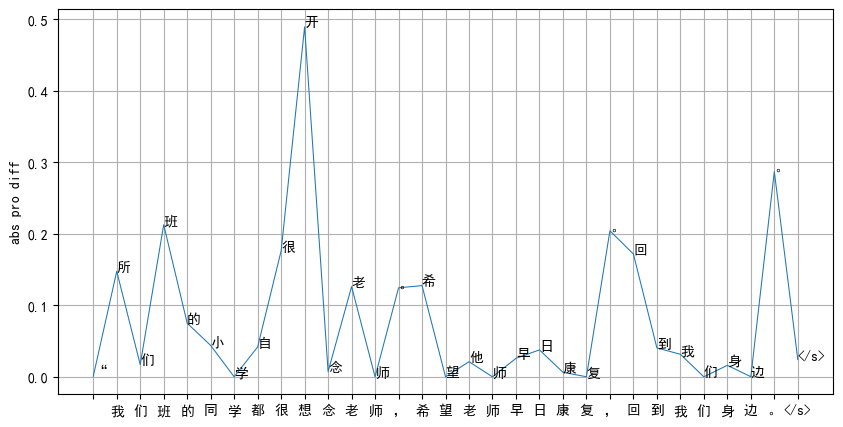

In [105]:
fig = plt.figure(figsize=(10,5))

plt.plot(list(range(diff_list.shape[0])), diff_list[:, 0], linewidth=0.75)
for i in range(diff_list.shape[0]):
    plt.text(i, diff_list[:, 0][i], tokenizer.decode(indices_list[i][0]))
plt.xticks(list(range(diff_list.shape[0])), [tokenizer.decode(id) for id in token_list])
plt.ylabel("abs pro diff")
plt.grid()
plt.show()